# FEMA Flood Insurance Policy EDA and Analysis
Rachael Hobbs </br>
11-24-2025 </br>
CPS 285 Dr. Li 

In [157]:
%run flood_helpers.ipynb
# .ipynb file with import packages and def functions to help clean up main notebook

## Introduction

The dataset, obtained from FEMA’s National Flood Insurance Policy Database on [Kaggle](https://www.kaggle.com/datasets/lynma01/femas-national-flood-insurance-policy-database) provides structured information about policies under the National Flood Insurance Program (NFIP). Created by Congress, the NFIP helps reduce flood-related losses through data-driven risk assessment, floodplain management, and accessible insurance coverage. This data captures key attributes of issued policies, including risk metrics and policy characteristics.

The original FEMA National Flood Insurance Policy Database contains over 50 million observations and 45 features, encompassing detailed flood insurance data nationwide. For this project, I created a focused subset to extract key features most relevant to flood risk analysis.
[Source](https://www.fema.gov/openfema-data-page/fima-nfip-redacted-policies-v2)

Included Feature Categories:

* Risk and Geospatial: Flood zone, elevation measures, location identifiers (ZIP code, county, census tract, state, city), and building type indicators.

* Policy: Total coverage, premiums, deductibles, and policy effective or termination dates.


Secondary dataset is US Census Demographic Data obtained from [Kaggle](https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data) used to compare policies 



### 1. Import Data

#### Load Flood Insurance Policy Data and Rename Columns

In [3]:
flood_policies = load_data("nfip-flood-policies.csv")
flood_policies.shape

(50406944, 45)

In [4]:
flood_policies.head(5)

,agriculturestructureindicator,basefloodelevation,basementenclosurecrawlspacetype,cancellationdateoffloodpolicy,censustract,condominiumindicator,construction,countycode,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,federalpolicyfee,floodzone,hfiaasurcharge,houseofworshipindicator,latitude,locationofcontents,longitude,lowestadjacentgrade,lowestfloorelevation,nonprofitindicator,numberoffloorsininsuredbuilding,obstructiontype,occupancytype,originalconstructiondate,originalnbdate,policycost,policycount,policyeffectivedate,policyterminationdate,policytermindicator,postfirmconstructionindicator,primaryresidenceindicator,propertystate,reportedzipcode,ratemethod,regularemergencyprogramindicator,reportedcity,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
0,NaN,NaN,2.0,NaN,3.301304e+10,N,N,33013.0,0.00,0,0,N,NaN,999.0,13.0,X,0.0,NaN,43.3,Basement/Enclosure/Crawlspace/Subgrade Crawlsp...,-71.8,NaN,NaN,NaN,2.0,NaN,1.0,1974-12-30,2008-08-19,388.0,1.0,2009-08-19,2010-08-19,1.0,N,Y,NH,03278,7,R,WARNER,NaN,250000.0,100000.0,375.0
1,NaN,NaN,0.0,NaN,2.206304e+10,N,N,22063.0,0.05,1,1,N,NaN,999.0,35.0,AE,0.0,NaN,30.5,Lowest floor only above ground level (No basem...,-91.0,NaN,NaN,NaN,1.0,NaN,3.0,1974-07-01,1997-10-04,315.0,1.0,2009-10-04,2010-10-04,1.0,N,Y,LA,70726,1,R,DENHAM SPRINGS,NaN,16400.0,8800.0,280.0
2,NaN,NaN,0.0,NaN,4.505106e+10,N,N,45051.0,0.00,0,0,N,1,999.0,13.0,X,0.0,NaN,33.7,Lowest floor only above ground level (No basem...,-79.0,NaN,NaN,NaN,1.0,NaN,1.0,2003-07-01,2005-08-13,348.0,1.0,2009-08-13,2010-08-13,1.0,Y,Y,SC,29579,7,R,MYRTLE BEACH,NaN,250000.0,100000.0,335.0
3,NaN,519.0,2.0,2016-04-01,1.055001e+09,N,N,1055.0,0.00,1,1,Y,NaN,-2.0,35.0,AE,0.0,NaN,34.0,NaN,-86.0,517.3,517.3,NaN,3.0,50,1.0,1989-01-01,2006-04-14,951.0,1.0,2009-04-14,2010-04-14,1.0,Y,Y,AL,35901,2,R,GADSDEN,NaN,174900.0,21000.0,916.0
4,NaN,7.0,0.0,NaN,1.208600e+10,N,N,12086.0,0.00,0,0,N,3,0.0,35.0,A10,0.0,NaN,26.0,Lowest floor only above ground level (No basem...,-80.1,NaN,6.9,NaN,1.0,NaN,1.0,1957-07-01,1996-04-04,1323.0,1.0,2009-04-04,2010-04-04,1.0,N,Y,FL,33160,1,R,GOLDEN BEACH,NaN,250000.0,100000.0,1288.0


In [5]:
policies_df = rename_flood_columns(flood_policies)
for col in policies_df.columns:
    print(col)

agriculture_structure_indicator
base_flood_elevation
basement_enclosure_crawlspace_type
cancellation_date_of_flood_policy
census_tract
condominium_indicator
construction
county_code
crs_discount
deductible_amount_in_building_coverage
deductible_amount_in_contents_coverage
elevated_building_indicator
elevation_certificate_indicator
elevation_difference
federal_policy_fee
flood_zone
hfiaa_surcharge
house_of_worship_indicator
latitude
location_of_contents
longitude
lowest_adjacent_grade
lowest_floor_elevation
non_profit_indicator
number_of_floors_in_insured_building
obstruction_type
occupancy_type
original_construction_date
original_nb_date
policy_cost
policy_count
policy_effective_date
policy_termination_date
policy_term_indicator
post_firm_construction_indicator
primary_residence_indicator
property_state
reported_zipcode
rate_method
regular_emergency_program_indicator
reported_city
small_business_indicator_building
total_building_insurance_coverage
total_contents_insurance_coverage
tota

#### Create New Feature
$
\text{Premium Rate} = \frac{\text{Total Premium}}{\text{Total Coverage (Building and Contents)}}
$

In [6]:
total_coverage = policies_df['total_building_insurance_coverage'] + policies_df['total_contents_insurance_coverage']
premium = policies_df['total_insurance_premium_of_the_policy']

# Use Where numpy feature to take care of division by zero
policies_df['premium_rate'] = np.where(total_coverage == 0,
                                            np.nan,
                                            premium / total_coverage)

#### Load Census Demographic Data and Rename Columns

In [7]:
census_df = load_data("acs2015_census_tract_data.csv")

In [8]:
census_df.shape

(74001, 37)

In [9]:
census_df.head(5)

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,1503,61838.0,11900.0,25713.0,4548.0,8.1,8.4,34.7,17.0,21.3,11.9,15.2,90.2,4.8,0.0,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,1662,32303.0,13538.0,18021.0,2474.0,25.5,40.3,22.3,24.7,21.5,9.4,22.0,86.3,13.1,0.0,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,2335,44922.0,5629.0,20689.0,2817.0,12.7,19.7,31.4,24.9,22.1,9.2,12.4,94.8,2.8,0.0,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,3306,54329.0,7003.0,24125.0,2870.0,2.1,1.6,27.0,20.8,27.0,8.7,16.4,86.6,9.1,0.0,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,7666,51965.0,6935.0,27526.0,2813.0,11.4,17.5,49.6,14.2,18.2,2.1,15.8,88.0,10.5,0.0,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [10]:
# Uses helper function using Regex to rename columns from PascalCase to snake_case
census_df = census_df.rename(columns=pascal_to_snake)
for col in census_df.columns:
    print(col)

census_tract
state
county
total_pop
men
women
hispanic
white
black
native
asian
pacific
citizen
income
income_err
income_per_cap
income_per_cap_err
poverty
child_poverty
professional
service
office
construction
production
drive
carpool
transit
walk
other_transp
work_at_home
mean_commute
employed
private_work
public_work
self_employed
family_work
unemployment


In [145]:
census_df['census_tract'] = census_df['census_tract'].astype(float)
census_df['census_tract'] = census_df['census_tract'].astype(int)
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   census_tract        74001 non-null  int64  
 1   state               74001 non-null  object 
 2   county              74001 non-null  object 
 3   total_pop           74001 non-null  int64  
 4   men                 74001 non-null  int64  
 5   women               74001 non-null  int64  
 6   hispanic            73311 non-null  float64
 7   white               73311 non-null  float64
 8   black               73311 non-null  float64
 9   native              73311 non-null  float64
 10  asian               73311 non-null  float64
 11  pacific             73311 non-null  float64
 12  citizen             74001 non-null  int64  
 13  income              72901 non-null  float64
 14  income_err          72901 non-null  float64
 15  income_per_cap      73261 non-null  float64
 16  inco

#### Subset Census Data
Select only Census Tract, Total Population, and Poverty

In [146]:
census_subset = census_df[["census_tract", "total_pop", "poverty"]]
census_subset.head()

,census_tract,total_pop,poverty
0,1001020100,1948,8.1
1,1001020200,2156,25.5
2,1001020300,2968,12.7
3,1001020400,4423,2.1
4,1001020500,10763,11.4


In [147]:
census_subset['census_tract'] = census_subset['census_tract'].astype('object')
census_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   census_tract  74001 non-null  object 
 1   total_pop     74001 non-null  int64  
 2   poverty       73166 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


C:\Users\Hobbs\AppData\Local\Temp\ipykernel_28052\3848831240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_subset['census_tract'] = census_subset['census_tract'].astype('object')


### 2. Pre-Procesing
#### Clean Census Dataset

Cleaning the data involved dropping na values and dropping duplicates. For the flood policiy data, several features had over 50% missing data. These catagories were imputed with "Unknown" since the related to building type.

Percent Census dataset is NA

In [148]:
(census_subset.isna().sum()/len(census_subset)).sort_values()

census_tract    0.000000
total_pop       0.000000
poverty         0.011284
dtype: float64

In [149]:
census_na_count = census_subset.isna().sum()
print("Census Missing Values Dropped:", census_na_count)
census_cleaned = census_subset.dropna()

Census Missing Values Dropped: census_tract      0
total_pop         0
poverty         835
dtype: int64


In [150]:
census_dup_count = census_cleaned.duplicated().sum()
print("Census Duplicates Dropped:", census_dup_count)
census_cleaned = census_cleaned.drop_duplicates()

Census Duplicates Dropped: 0


#### Clean Flood Insurance Policy Dataset

In [16]:
policies_dup_count = policies_df.duplicated().sum()
print("Policy Duplicases Dropped:", policies_dup_count)
policies_df = policies_df.drop_duplicates().copy()

Policy Duplicases Dropped: 929737


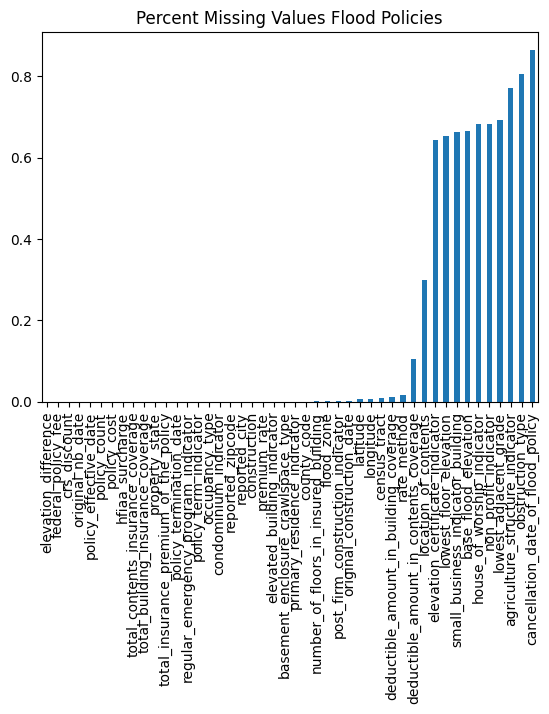

In [17]:
# Percentage NA Values
plt.figure()
na_percents=policies_df.isna().sum()/len(policies_df)
na_percents.sort_values().plot(kind="bar")
plt.title("Percent Missing Values Flood Policies")
plt.show()

Select Subset of Columns

In [18]:
# Helper function filters data to subset of features
df_subset = flood_subset(policies_df).copy()

Fill Columns with large percentage of Missing Values with "Unknown" value.

In [19]:
# Fill different building types and cancelation date with Unknown
df_subset[col_to_fill] = df_subset[col_to_fill].fillna("Unknown")

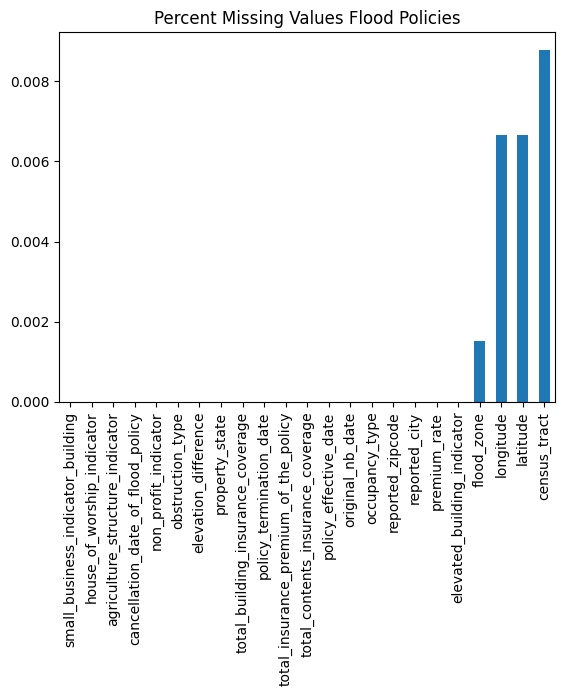

In [20]:
# Percentage NA Values
plt.figure()
na_percents = df_subset.isna().sum()/len(df_subset)
na_percents.sort_values().plot(kind="bar")
plt.title("Percent Missing Values Flood Policies")
plt.show()

In [21]:
policies_na_count = df_subset.isna().sum()
print("Policy Missing Values Dropped:\n", policies_na_count)
policies_cleaned = df_subset.dropna().copy()

Policy Missing Values Dropped:
 flood_zone                                74982
latitude                                 330117
longitude                                330117
property_state                                1
reported_city                                12
small_business_indicator_building             0
elevated_building_indicator                 259
elevation_difference                          1
reported_zipcode                              8
census_tract                             434828
occupancy_type                                7
obstruction_type                              0
non_profit_indicator                          0
house_of_worship_indicator                    0
agriculture_structure_indicator               0
cancellation_date_of_flood_policy             0
original_nb_date                              1
policy_effective_date                         1
policy_termination_date                       1
total_building_insurance_coverage             1
total_co

Verify Data Type

In [143]:
# errors handles the "Unknown" filled in earlier for cancellation date. Fills with NA.
policies_cleaned['cancellation_date_of_flood_policy'] = pd.to_datetime(policies_cleaned['cancellation_date_of_flood_policy'], errors='coerce')
policies_cleaned['original_nb_date'] = pd.to_datetime(policies_cleaned['original_nb_date'])
policies_cleaned['policy_effective_date'] = pd.to_datetime(policies_cleaned['policy_effective_date'])
policies_cleaned['policy_termination_date'] = pd.to_datetime(policies_cleaned['policy_termination_date'])
policies_cleaned['census_tract'] = policies_cleaned['census_tract'].astype(float)
policies_cleaned['census_tract'] = policies_cleaned['census_tract'].astype(int)
policies_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48970509 entries, 0 to 50406942
Data columns (total 28 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   flood_zone                             object        
 1   latitude                               float64       
 2   longitude                              float64       
 3   property_state                         object        
 4   reported_city                          object        
 5   small_business_indicator_building      object        
 6   elevated_building_indicator            object        
 7   elevation_difference                   float64       
 8   reported_zipcode                       object        
 9   census_tract                           int64         
 10  occupancy_type                         float64       
 11  obstruction_type                       object        
 12  non_profit_indicator                   object        
 13  

### FEMA Flood Zoon Designations
The NFIP approaches the goal of reducing comprehensive flood risk primarily by requiring participating communities to collaborate with FEMA to develop and adopt flood maps called Flood Insurance Rate Maps (FIRMs). An area of specific focus of the FIRM is the Special Flood Hazard Area (SFHA). The SFHA is defined by FEMA as an area with a 1% or greater risk of flooding every year. FIRMs provide the basis for identifying properties whose owners are required to purchase flood insurance and establishing floodplain management standards that communities must adopt and enforce as part of their participation in the NFIP. [Source](https://www.congress.gov/crs-product/IF10988)

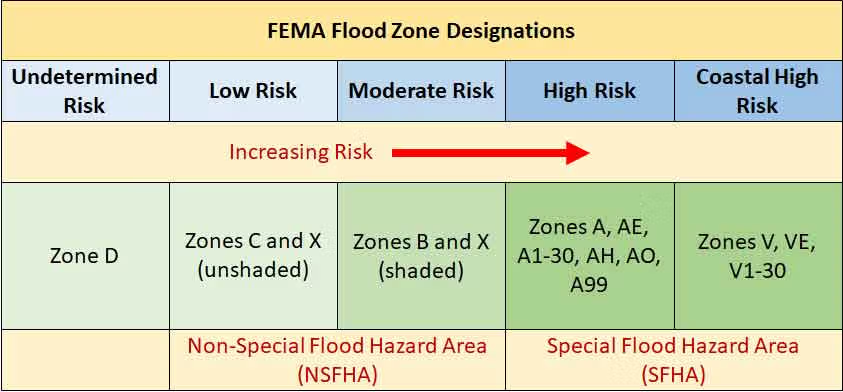

In [23]:
img = Image.open('flood_zones.avif')
display(img)

The type of flood zone that you are in affects the cost of flood insurance policies and flood insurance is mandatory in some flood zones. Special Flood Hazard Areas (SFHAs) are the areas that are at the greatest risk of flooding, mudflow, or flood-related erosion. [Source](https://climatecheck.com/risks/flood/what-are-the-flood-zones-in-fema-maps)


In [24]:
policies_cleaned['flood_zone'].unique()

array(['X', 'AE', 'A10', 'A02', 'A06', 'A08', 'C', 'B', 'AHB', 'VE', 'A',
       'A01', 'V14', 'A05', 'AO', 'AH', 'A04', 'A07', 'A14', 'A12', 'A15',
       'A13', 'A03', 'AOB', 'A17', 'A11', 'V12', 'D', 'A09', 'V10', 'A16',
       'A99', 'V20', 'A18', 'V06', 'A20', 'V19', 'A28', 'V09', 'V15',
       'V01', 'AR', 'V11', 'V13', 'V21', 'A22', 'V05', 'A19', 'A23',
       'A21', 'V08', 'V17', 'V04', 'A0B', 'V', 'V16', 'V18', 'V07', 'V02',
       'V03', 'V27', 'A27', 'A30', 'V23', 'V22', 'A24', 'V24', 'A25',
       'A26', 'V30', 'A29', 'A00', 'V29', 'V28', 'ALT', '*', 'V8', 'A0',
       'EMG', 'V9', 'ARE', 'X 0', 'A E', 'AO8', 'E', '00X'], dtype=object)

#### Creates new Columns for different Flood Zone Destinations
Combined Moderate and Low as X is in both
Handled extra values need to be filtered, 'EMG' '00X' and '*'

In [27]:
mask = policies_cleaned['flood_zone'].str.contains('^A')
policies_cleaned['high_flood_zone'] = False
policies_cleaned.loc[mask, 'high_flood_zone'] = True
mask = policies_cleaned['flood_zone'].str.contains('^V')
policies_cleaned['coastal_high_flood_zone'] = False
policies_cleaned.loc[mask, 'coastal_high_flood_zone'] = True
mask = policies_cleaned['flood_zone'].str.contains('^[BCX0]')
policies_cleaned['low_moderate_flood_zone'] = False
policies_cleaned.loc[mask, 'low_moderate_flood_zone'] = True
mask = policies_cleaned['flood_zone'].str.contains('^[*DEn]')
policies_cleaned['undetermined_flood_zone'] = False
policies_cleaned.loc[mask, 'undetermined_flood_zone'] = True
policies_cleaned['floodzone_catagory'] = policies_cleaned[floodzone_types].idxmax(axis=1)
policies_cleaned.head(5)

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,elevated_building_indicator,elevation_difference,reported_zipcode,census_tract,occupancy_type,obstruction_type,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,floodzone_catagory
0,X,43.3,-71.8,NH,WARNER,Unknown,N,999.0,03278,33013038500.0,1.0,Unknown,Unknown,Unknown,Unknown,NaT,2008-08-19,2009-08-19,2010-08-19,250000.0,100000.0,375.0,0.001071,False,False,True,False,low_moderate_flood_zone
1,AE,30.5,-91.0,LA,DENHAM SPRINGS,Unknown,N,999.0,70726,22063040700.0,3.0,Unknown,Unknown,Unknown,Unknown,NaT,1997-10-04,2009-10-04,2010-10-04,16400.0,8800.0,280.0,0.011111,True,False,False,False,high_flood_zone
2,X,33.7,-79.0,SC,MYRTLE BEACH,Unknown,N,999.0,29579,45051060204.0,1.0,Unknown,Unknown,Unknown,Unknown,NaT,2005-08-13,2009-08-13,2010-08-13,250000.0,100000.0,335.0,0.000957,False,False,True,False,low_moderate_flood_zone
3,AE,34.0,-86.0,AL,GADSDEN,Unknown,Y,-2.0,35901,1055001200.0,1.0,50,Unknown,Unknown,Unknown,2016-04-01,2006-04-14,2009-04-14,2010-04-14,174900.0,21000.0,916.0,0.004676,True,False,False,False,high_flood_zone
4,A10,26.0,-80.1,FL,GOLDEN BEACH,Unknown,N,0.0,33160,12086000115.0,1.0,Unknown,Unknown,Unknown,Unknown,NaT,1996-04-04,2009-04-04,2010-04-04,250000.0,100000.0,1288.0,0.003680,True,False,False,False,high_flood_zone


### Merge Datasets
Merge Cleaned Census and Polices Datasets

In [151]:
df_merged = pd.merge(policies_cleaned, census_subset, how = "left", on = "census_tract")
df_merged.shape

(48970509, 30)

### Describe Cleaned Dataset

In [29]:
df_merged.describe()

,latitude,longitude,elevation_difference,occupancy_type,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,total_pop,poverty
count,4.897051e+07,4.897051e+07,4.897051e+07,4.897051e+07,6690738,48970509,48970509,48970509,4.897051e+07,4.897051e+07,4.897051e+07,4.897051e+07,0.0,0.0
mean,3.261875e+01,-8.786584e+01,6.499369e+02,1.341671e+00,2015-11-11 15:14:19.704622336,2009-05-03 20:21:57.766264064,2014-03-13 01:32:52.452725504,2015-02-11 11:28:54.983552768,2.371767e+05,5.719565e+04,7.771479e+02,3.748228e-03,NaN,NaN
min,-1.430000e+01,-1.707000e+02,-9.995000e+03,1.000000e+00,1985-06-19 00:00:00,1984-03-09 00:00:00,2009-01-01 00:00:00,2009-01-02 00:00:00,0.000000e+00,0.000000e+00,-5.928000e+03,-3.660377e-01,NaN,NaN
25%,2.820000e+01,-9.420000e+01,2.000000e+00,1.000000e+00,2014-04-04 00:00:00,2006-06-29 00:00:00,2011-07-14 00:00:00,2012-06-18 00:00:00,1.355000e+05,3.000000e+03,3.340000e+02,1.120000e-03,NaN,NaN
50%,3.030000e+01,-8.260000e+01,9.990000e+02,1.000000e+00,2016-03-31 00:00:00,2010-07-09 00:00:00,2014-02-05 00:00:00,2014-12-27 00:00:00,2.500000e+05,5.450000e+04,3.900000e+02,1.625000e-03,NaN,NaN
75%,3.770000e+01,-8.020000e+01,9.990000e+02,1.000000e+00,2017-08-24 00:00:00,2013-03-22 00:00:00,2016-10-20 00:00:00,2017-09-26 00:00:00,2.500000e+05,1.000000e+05,7.860000e+02,5.128000e-03,NaN,NaN
max,6.690000e+01,1.458000e+02,9.998000e+03,6.000000e+00,2045-06-04 00:00:00,2019-12-08 00:00:00,2020-09-16 00:00:00,2020-12-26 00:00:00,2.497500e+08,6.000000e+06,1.061158e+06,2.549500e+01,NaN,NaN
std,5.732114e+00,1.327882e+01,4.786066e+02,9.592220e-01,NaN,NaN,NaN,NaN,1.011007e+06,5.919564e+04,1.647320e+03,8.320216e-03,NaN,NaN


In [30]:
df_merged.describe(include=("object","bool"))

,flood_zone,property_state,reported_city,small_business_indicator_building,elevated_building_indicator,reported_zipcode,census_tract,obstruction_type,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,floodzone_catagory
count,48970509,48970509,48970509,48970509,48970509,48970509,48970509,48970509,48970509,48970509,48970509,48970509,48970509,48970509,48970509,48970509
unique,86,56,40590,3,2,32830,72195,24,3,14,3,2,2,2,2,4
top,X,FL,HOUSTON,Unknown,N,70065,45019004608.0,Unknown,Unknown,Unknown,Unknown,True,False,False,False,high_flood_zone
freq,17742710,14637783,1978216,32596799,40875137,161185,68737,39511955,33613695,33598417,37994942,26346186,48443218,26903169,48940817,26346186


#### State Counts

In [31]:
state_count = df_merged['property_state'].value_counts()
state_count

property_state
FL    14637783
TX     7025558
LA     5414833
CA     2681338
NJ     2032932
        ...   
DC       16364
VI        7049
GU        2367
CM          98
AS          64
Name: count, Length: 56, dtype: int64

#### Absolute Correlation Map

Text(0.5, 1.0, 'Correlation Map for Absolute Value of Correlation')

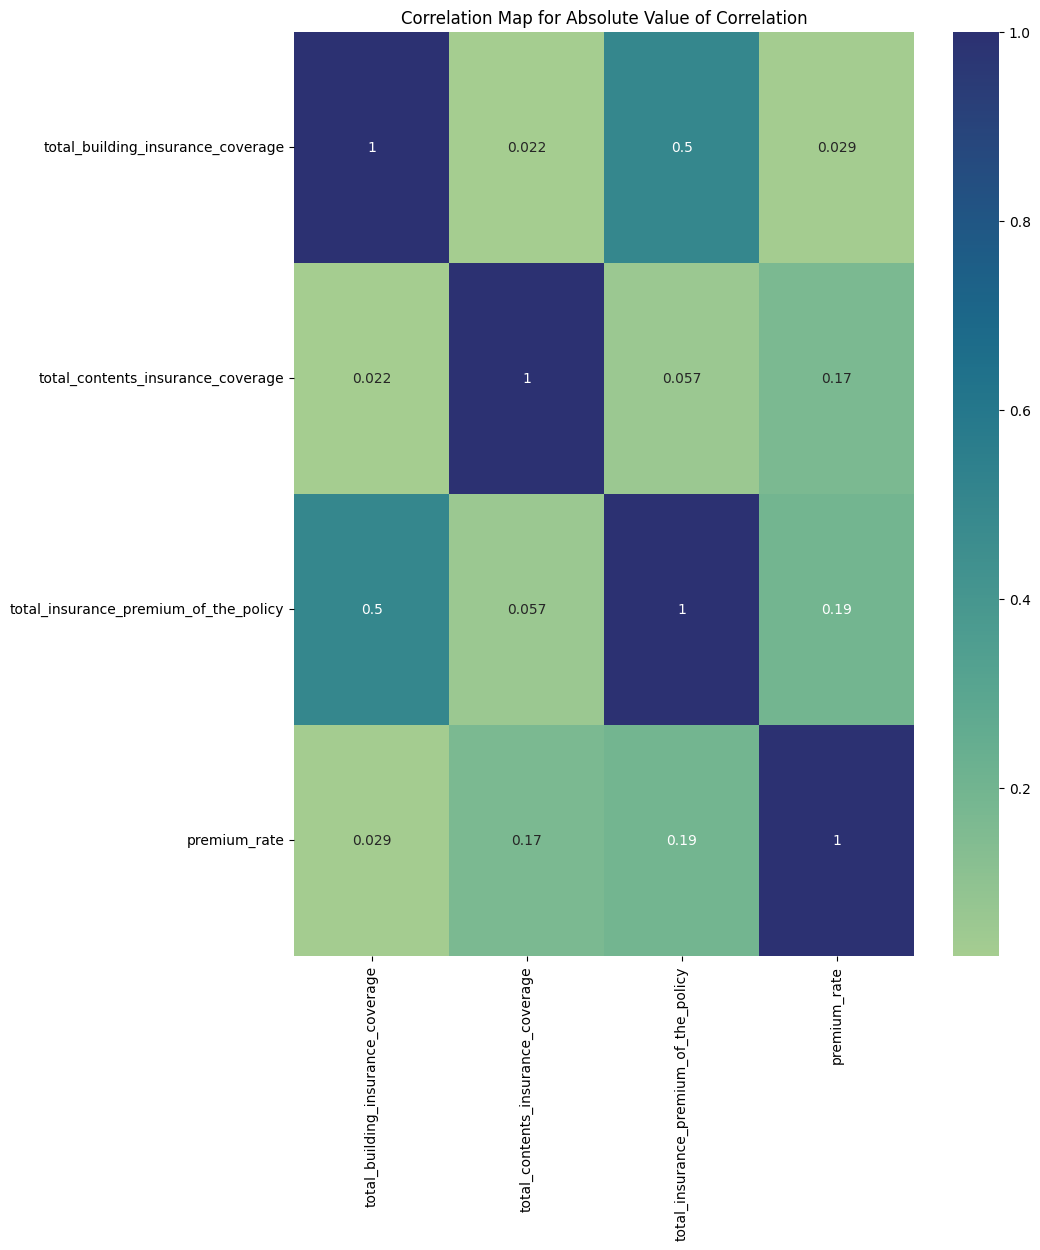

In [32]:
df_numeric = df_merged[numeric_col]
correlation_matrix = df_numeric.corr().abs()
plt.figure(figsize=(10,12))
sns.heatmap(correlation_matrix, cmap= "crest", annot=True)
plt.title("Correlation Map for Absolute Value of Correlation")

### Create Subsets
Create State Subsets for Michigan and Flordia

In [152]:
df_michigan = df_merged[df_merged['property_state'] == 'MI']
df_michigan.head(5)

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,elevated_building_indicator,elevation_difference,reported_zipcode,census_tract,occupancy_type,obstruction_type,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,floodzone_catagory,total_pop,poverty
416,C,43.1,-86.2,MI,SPRING LAKE,Unknown,N,999.0,49456,26139021100,1.0,Unknown,Unknown,Unknown,Unknown,NaT,2007-09-06,2009-09-06,2010-09-06,125000.0,50000.0,294.0,0.001680,False,False,True,False,low_moderate_flood_zone,4769.0,5.1
628,X,42.3,-83.3,MI,DEARBORN HGTS,Unknown,N,999.0,48125,26163572700,1.0,Unknown,Unknown,Unknown,Unknown,NaT,1999-08-18,2009-01-12,2010-01-12,172700.0,0.0,585.0,0.003387,False,False,True,False,low_moderate_flood_zone,4138.0,11.7
755,C,42.1,-86.4,MI,SAINT JOSEPH,Unknown,N,999.0,49085,26021001800,1.0,10,Unknown,Unknown,Unknown,2010-06-16,1997-06-16,2009-06-16,2010-06-16,150000.0,60000.0,283.0,0.001348,False,False,True,False,low_moderate_flood_zone,4772.0,6.1
1150,AE,42.8,-86.2,MI,MACATAWA,Unknown,N,0.0,49434,26139022107,4.0,Unknown,Unknown,Unknown,Unknown,NaT,2007-07-20,2009-07-20,2010-07-20,500000.0,0.0,2500.0,0.005000,True,False,False,False,high_flood_zone,1156.0,2.3
1337,AE,42.3,-83.8,MI,ANN ARBOR,Unknown,N,999.0,48103,26161404100,1.0,Unknown,Unknown,Unknown,Unknown,NaT,2008-04-08,2009-04-08,2010-04-08,70000.0,0.0,638.0,0.009114,True,False,False,False,high_flood_zone,3216.0,6.1


In [153]:
df_flordia = df_merged[df_merged['property_state'] == 'FL']
df_flordia.head(5)

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,elevated_building_indicator,elevation_difference,reported_zipcode,census_tract,occupancy_type,obstruction_type,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,floodzone_catagory,total_pop,poverty
4,A10,26.0,-80.1,FL,GOLDEN BEACH,Unknown,N,0.0,33160,12086000115,1.0,Unknown,Unknown,Unknown,Unknown,NaT,1996-04-04,2009-04-04,2010-04-04,250000.0,100000.0,1288.0,0.003680,True,False,False,False,high_flood_zone,2644.0,10.7
9,X,28.0,-82.6,FL,TAMPA,Unknown,N,999.0,33607,12057011708,3.0,Unknown,Unknown,Unknown,Unknown,NaT,2007-09-13,2009-09-13,2010-09-13,43300.0,10700.0,419.0,0.007759,False,False,True,False,low_moderate_flood_zone,4271.0,7.9
11,AE,27.8,-80.5,FL,SEBASTIAN,Unknown,N,0.0,32958,12061050806,3.0,Unknown,Unknown,Unknown,Unknown,NaT,2009-12-01,2009-12-01,2010-12-01,269000.0,0.0,663.0,0.002465,True,False,False,False,high_flood_zone,5360.0,12.8
17,C,27.4,-82.5,FL,UNIVERSITY PK,Unknown,N,999.0,34201,12081000810,1.0,Unknown,Unknown,Unknown,Unknown,NaT,2003-05-20,2009-05-20,2010-05-20,150000.0,60000.0,283.0,0.001348,False,False,True,False,low_moderate_flood_zone,5680.0,3.6
19,X,30.5,-84.2,FL,TALLAHASSEE,Unknown,N,999.0,32308,12073001700,1.0,Unknown,Unknown,Unknown,Unknown,NaT,2007-07-06,2009-07-06,2010-07-06,250000.0,100000.0,335.0,0.000957,False,False,True,False,low_moderate_flood_zone,6827.0,7.9


### Flood Zones Comparisons

Explore different Flood Zones distrubutions for All US vs MI vs FL

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone US')

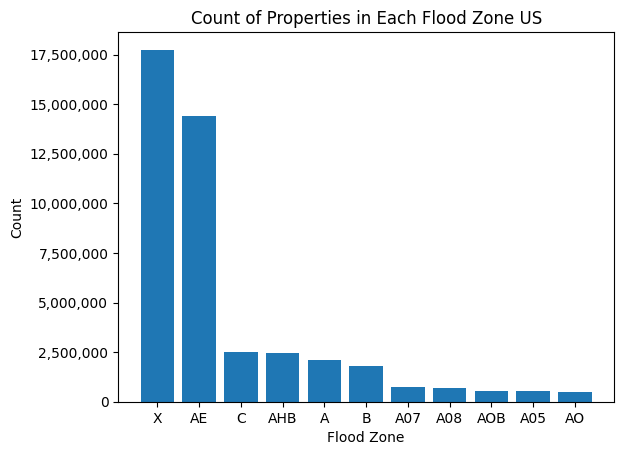

In [35]:
floodzone_counts = df_merged['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values
ax = plt.gca()
plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
ax.yaxis.set_major_formatter('{:,.0f}'.format)
plt.title("Count of Properties in Each Flood Zone US")

### 3. EDA
#### Sample Dataset
Created a sample Dataframe with 5000 rows from Flordia and 5000 rows from Michigan.

In [154]:
fl_sample = df_flordia.sample(n= 5000, random_state=42)
mi_sample = df_michigan.sample(n = 5000, random_state=42)
df_sample = pd.concat([fl_sample, mi_sample])
df_sample.head(5)

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,elevated_building_indicator,elevation_difference,reported_zipcode,census_tract,occupancy_type,obstruction_type,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone,floodzone_catagory,total_pop,poverty
45455649,AE,30.4,-86.4,FL,MIRAMAR BEACH,N,N,1.0,32550,12131950603,1.0,Unknown,N,N,N,2018-10-23,2012-05-22,2018-05-22,2018-10-23,250000.0,100000.0,569.0,0.001626,True,False,False,False,high_flood_zone,8582.0,5.7
34832250,X,28.6,-82.6,FL,BROOKSVILLE,N,N,999.0,34613,12053041600,1.0,Unknown,N,N,N,NaT,2016-09-01,2016-09-01,2017-09-01,250000.0,100000.0,348.0,0.000994,False,False,True,False,low_moderate_flood_zone,5488.0,6.7
17782529,X,27.3,-82.5,FL,SARASOTA,Unknown,N,999.0,34232,12115000405,1.0,Unknown,Unknown,Unknown,Unknown,NaT,1997-08-01,2012-08-01,2013-08-01,250000.0,100000.0,345.0,0.000986,False,False,True,False,low_moderate_flood_zone,3461.0,24.3
41821351,AE,25.5,-80.4,FL,HOMESTEAD,N,N,2.0,33032,12086010500,1.0,Unknown,N,N,N,NaT,2009-09-25,2018-09-25,2019-09-25,199100.0,95000.0,389.0,0.001323,True,False,False,False,high_flood_zone,10496.0,27.4
8930737,X,28.6,-80.8,FL,TITUSVILLE,Unknown,Y,999.0,32796,12009060500,1.0,10,Unknown,Unknown,Unknown,NaT,2010-05-20,2010-05-20,2011-05-20,75000.0,30000.0,217.0,0.002067,False,False,True,False,low_moderate_flood_zone,4871.0,16.6


#### Pair Plots for Sample Data

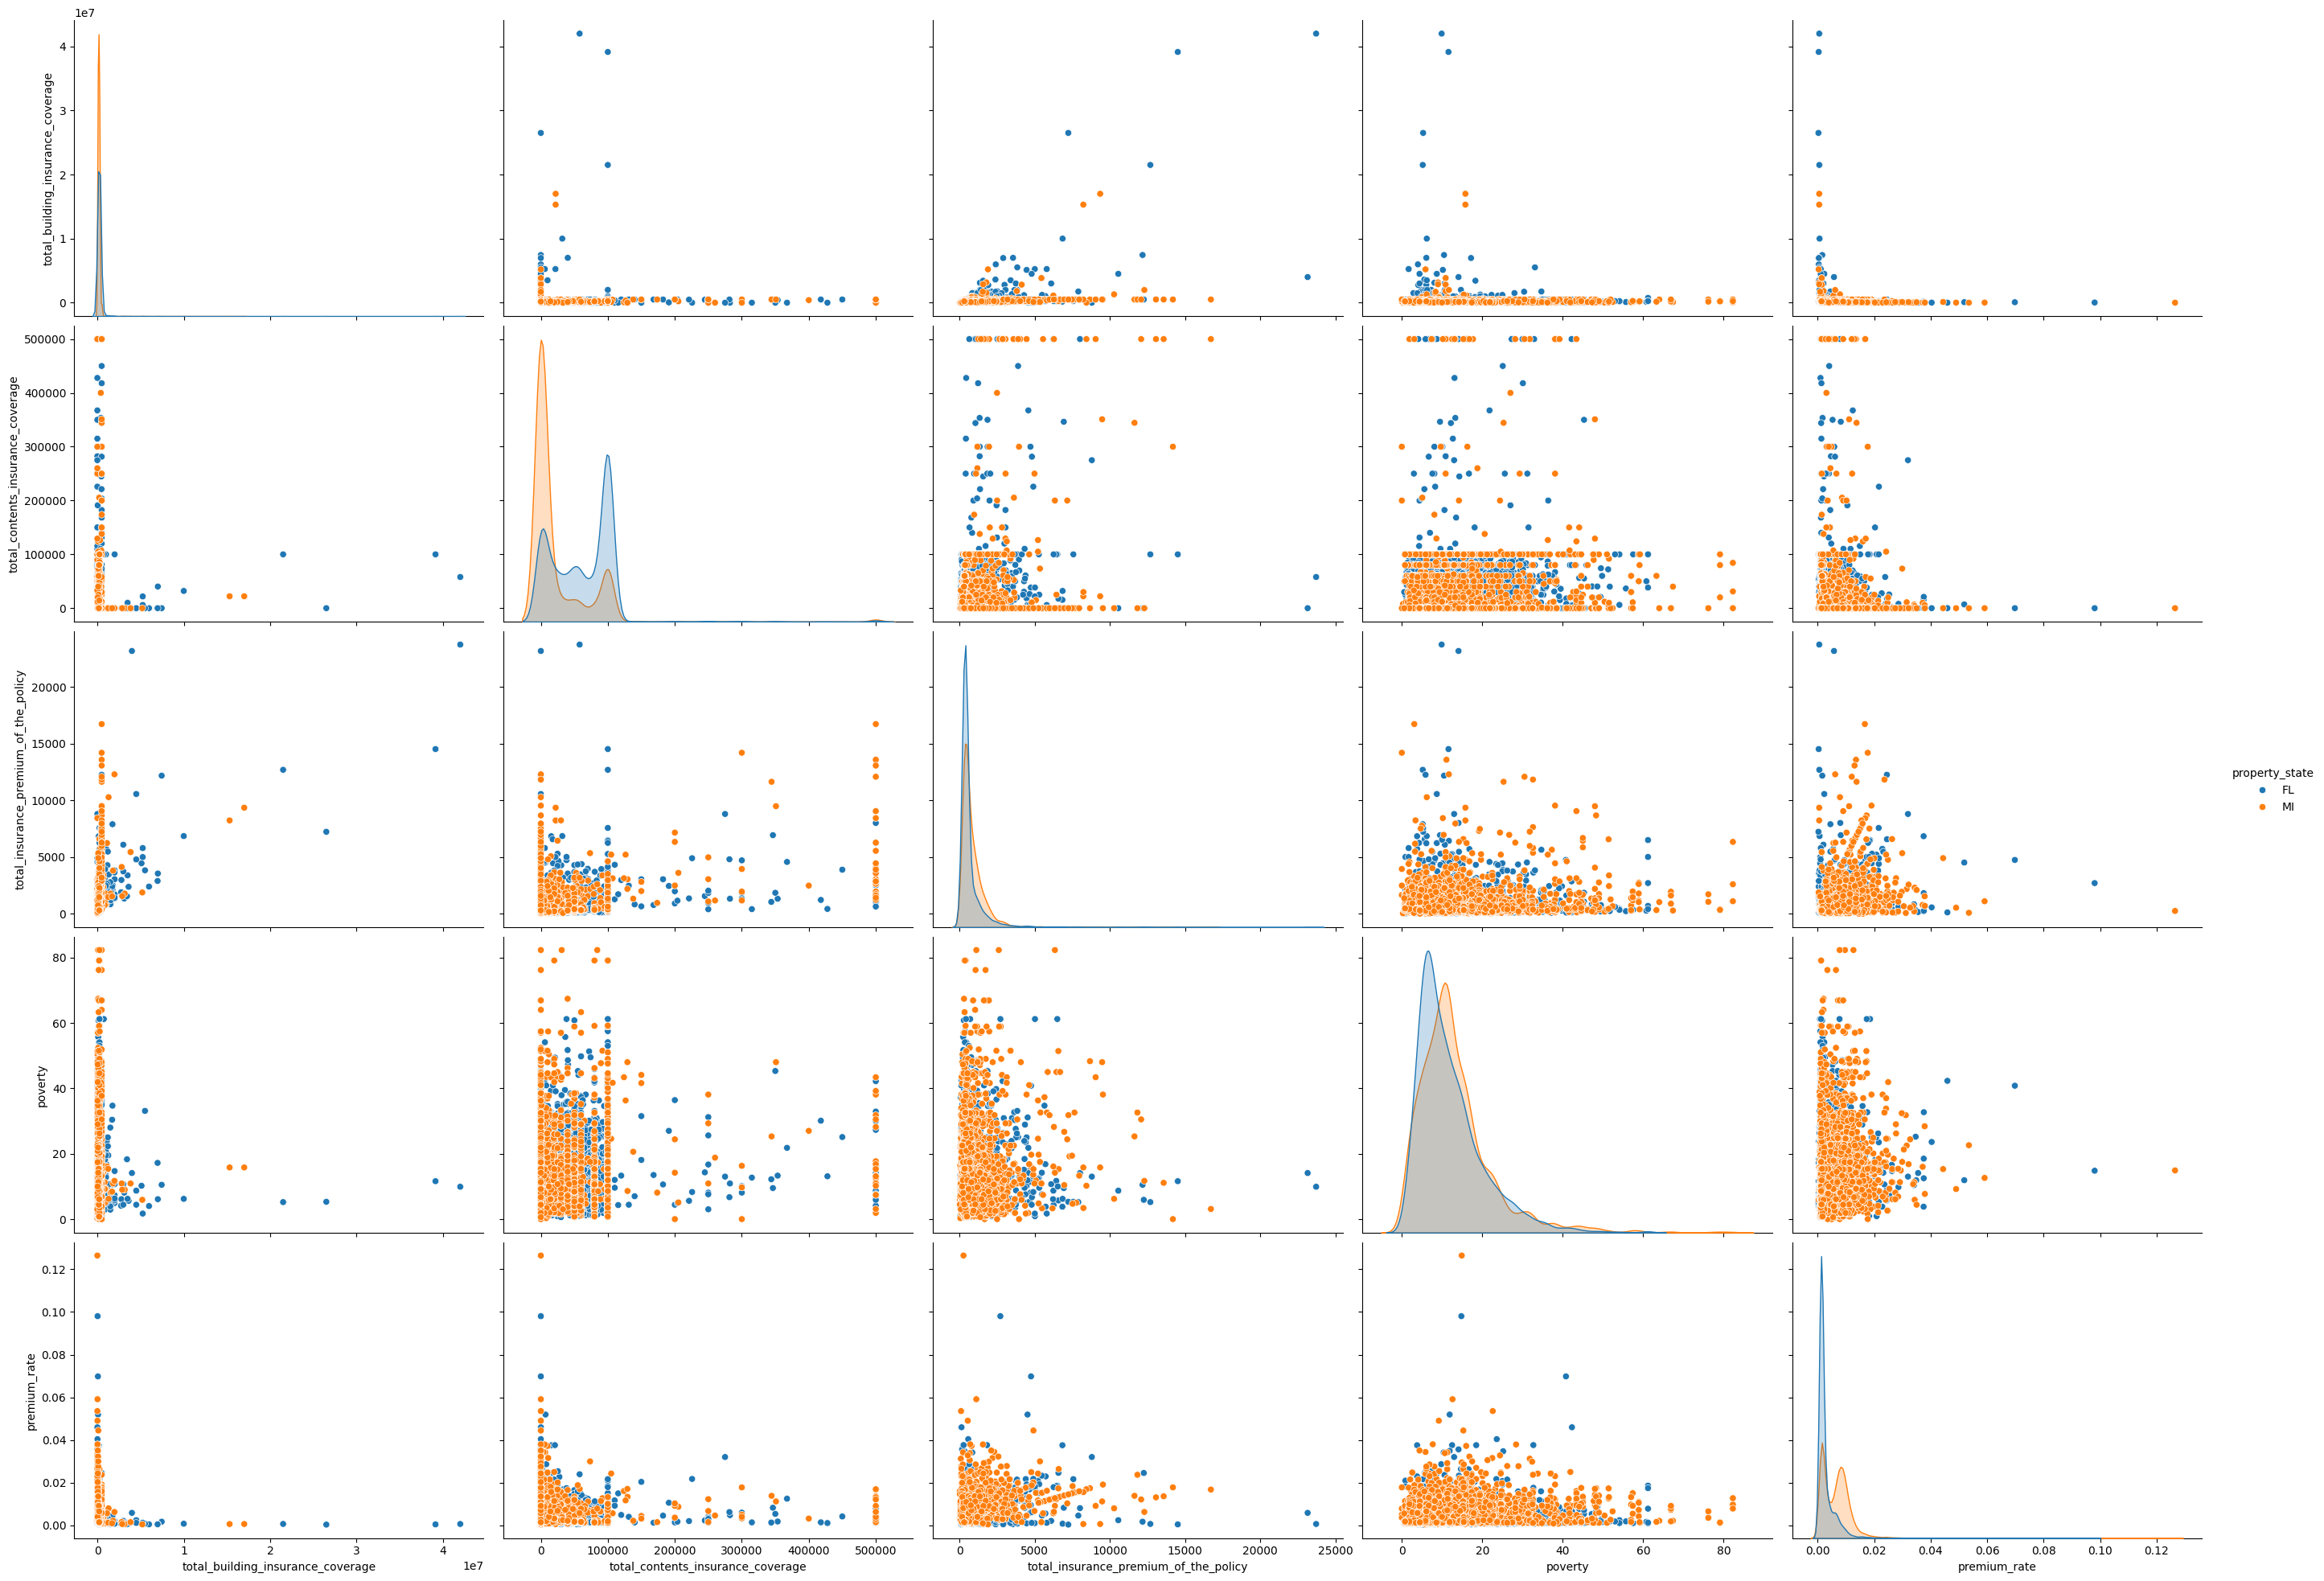

In [158]:
sns.pairplot(df_sample.loc[:,column_names], hue = "property_state", height = 4, aspect=1.4)

#### Description of Sample Data

In [ ]:
(df_sample.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
          .apply(lambda s: s.apply('{0:.2f}'.format))
)

,latitude,longitude,elevation_difference,occupancy_type,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,total_pop,poverty
count,10000.00,10000.00,10000.00,10000.00,1721.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,0.00,0.00
mean,35.01,-82.69,643.95,1.30,.2f,.2f,.2f,.2f,214210.58,42809.66,770.56,0.00,nan,nan
min,24.50,-90.20,-596.00,1.00,.2f,.2f,.2f,.2f,0.00,0.00,16.00,0.00,nan,nan
5%,25.80,-86.10,0.00,1.00,.2f,.2f,.2f,.2f,26600.00,0.00,196.95,0.00,nan,nan
25%,26.70,-83.70,2.00,1.00,.2f,.2f,.2f,.2f,105450.00,0.00,337.00,0.00,nan,nan
50%,36.35,-82.80,999.00,1.00,.2f,.2f,.2f,.2f,200000.00,21000.00,432.00,0.00,nan,nan
75%,42.60,-81.20,999.00,1.00,.2f,.2f,.2f,.2f,250000.00,100000.00,902.25,0.01,nan,nan
95%,43.70,-80.20,999.00,4.00,.2f,.2f,.2f,.2f,250000.00,100000.00,2143.00,0.01,nan,nan
99%,45.10,-80.10,999.00,6.00,.2f,.2f,.2f,.2f,722469.00,110201.00,4624.26,0.02,nan,nan
max,47.00,-80.00,999.00,6.00,.2f,.2f,.2f,.2f,42000000.00,500000.00,23710.00,0.13,nan,nan


Most variables are extreamly skewed.
Removed extream outliers that were more than 2.5 times the IQR from the quartiles.

In [43]:
df_numeric = df_sample[numeric_col].copy()
df_filtered = df_sample.copy()
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

bool_filter = ((df_numeric >= lower_bound) & (df_numeric <= upper_bound)).all(axis=1)

df_filtered = df_filtered[bool_filter]

#### Describe New Filtered Sample Data

In [44]:
df_filtered.shape

(9442, 30)

In [45]:
(df_filtered[column_names]
          .describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
          .apply(lambda s: s.apply('{0:.2f}'.format))
)

,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate
count,9442.00,9442.00,9442.00,9442.00
mean,174844.03,41371.98,615.89,0.00
std,88203.07,43767.26,454.31,0.00
min,0.00,0.00,16.00,0.00
5%,28325.00,0.00,192.00,0.00
25%,102300.00,0.00,335.00,0.00
50%,194700.00,24400.00,411.00,0.00
75%,250000.00,100000.00,784.00,0.01
95%,250000.00,100000.00,1651.00,0.01
99%,500000.00,100000.00,2115.00,0.02


#### Pair Plots for New Filtered Sampled Data

The maximum coverage for single-family dwellings (which also includes single-family residential units within a 2-4 family building) is $100,000 for contents and up to $250,000 for building coverage.

The maximum available coverage limit for other residential buildings is $500,000 for building coverage and $100,000 for contents coverage, and the maximum coverage limit for nonresidential business buildings is $500,000 for building coverage and $500,000 for contents coverage. [Source](https://www.congress.gov/crs-product/IF10988)

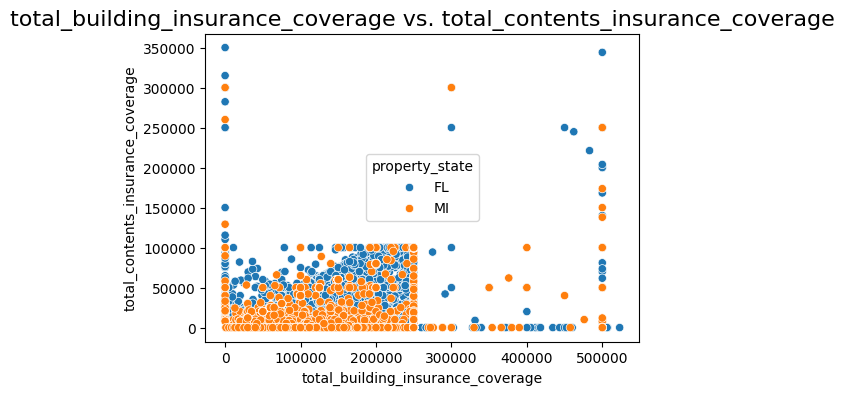

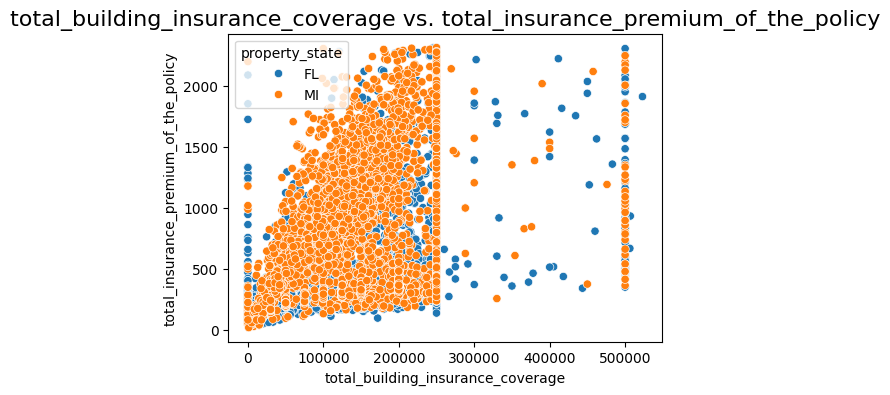

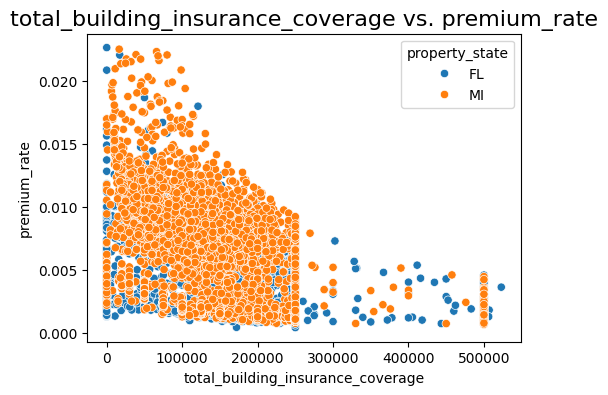

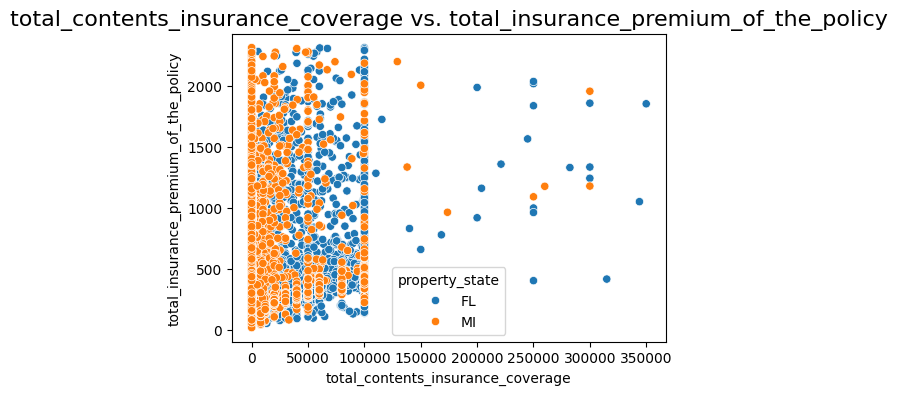

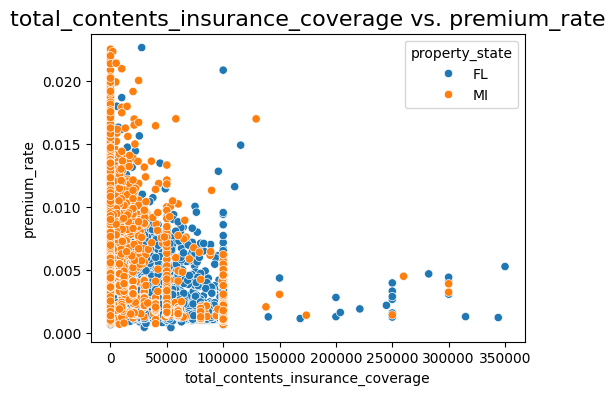

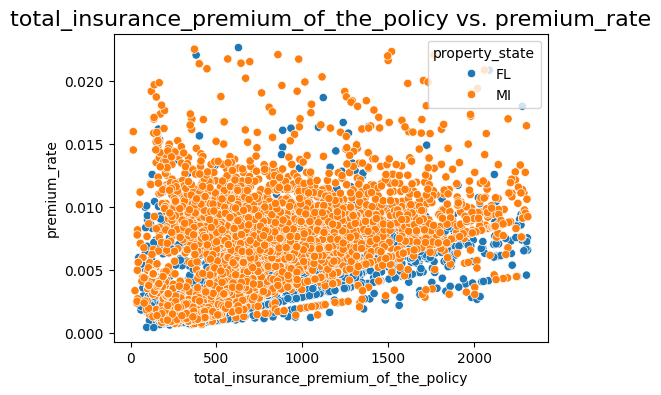

In [46]:
columns_numeric = column_names.copy()
columns_numeric.remove('property_state')
column_pairs = list(itertools.combinations(columns_numeric,2))

for col1, col2 in column_pairs:
    fig_height = 4
    fig_width = fig_height * 1.4

    plt.figure(figsize=(fig_width, fig_height))
    ax = sns.scatterplot(
        data = df_filtered,
        x = col1,
        y = col2,
        hue = "property_state"
    )
    ax.set_title(f'{col1} vs. {col2}', fontsize = 16)
    plt.show()


### Analytical Questions

1. How does the average premium rate (Premium / Coverage) compare across different flood zone ratings?

In [49]:
df_sample[['total_insurance_premium_of_the_policy', 'floodzone_catagory']].groupby('floodzone_catagory').describe()

total_insurance_premium_of_the_policy               \
                                                        count         mean   
floodzone_catagory                                                           
coastal_high_flood_zone                                  71.0  2990.380282   
high_flood_zone                                        6655.0   907.060406   
low_moderate_flood_zone                                3273.0   444.739383   
undetermined_flood_zone                                   1.0  1173.000000   

                                                                               
                                 std     min     25%     50%     75%      max  
floodzone_catagory                                                             
coastal_high_flood_zone  3084.365512   140.0  1178.5  2466.0  4282.5  23145.0  
high_flood_zone          1051.521214    26.0   377.0   597.0  1117.0  23710.0  
low_moderate_flood_zone   526.226052    16.0   313.0   348.0   392.0  12283.0  
undetermined_flood_zone          NaN  1173.0  1173.0  1173.0  1173.0   1173.0

In [67]:
df_sample[['premium_rate', 'floodzone_catagory']].groupby('floodzone_catagory').describe()


premium_rate                                          \
                               count      mean       std       min       25%   
floodzone_catagory                                                             
coastal_high_flood_zone         71.0  0.014600  0.008424  0.003241  0.009251   
high_flood_zone               6655.0  0.005822  0.005292  0.000273  0.001563   
low_moderate_flood_zone       3273.0  0.002031  0.001831  0.000651  0.001017   
undetermined_flood_zone          1.0  0.009694       NaN  0.009694  0.009694   

                                                       
                              50%       75%       max  
floodzone_catagory                                     
coastal_high_flood_zone  0.012884  0.017486  0.051897  
high_flood_zone          0.005326  0.008654  0.126500  
low_moderate_flood_zone  0.001243  0.002074  0.016524  
undetermined_flood_zone  0.009694  0.009694  0.009694

The total insurance premium and the preimum rate increase with increase flood risk with coastal high flood zone mean three times the high flood zone but is a much smaller sample.

2. For policies issued over time, has the amount of high-risk flood zone ratings increased compared to low-risk zones?

In [75]:
df_sample['year'] = df_sample['policy_effective_date'].dt.year

year_floodzone_counts = (
    df_sample.groupby(['year', 'floodzone_catagory'])
    .size().unstack(fill_value=0)
)

year_counts = (
    df_sample.groupby(['year'])
    .size()
)

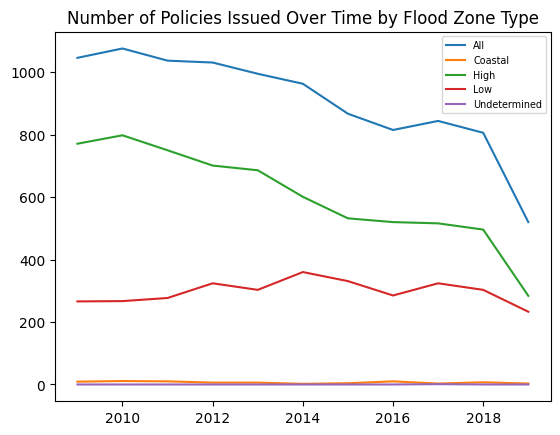

In [86]:
plt.plot(year_counts)
plt.plot(year_floodzone_counts)
plt.title("Number of Policies Issued Over Time by Flood Zone Type")


plt.legend(['All', 'Coastal',  'High', 'Low', 'Undetermined'], loc=1, fontsize='x-small')

The total number of policies decreased over time in the dataset with the number of policies issued for High Flood Zones decrease significantly compared to the other categories. 

3. What is the relation between the state and flood zone categories?


C:\Users\Hobbs\AppData\Local\Temp\ipykernel_28052\1697469150.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


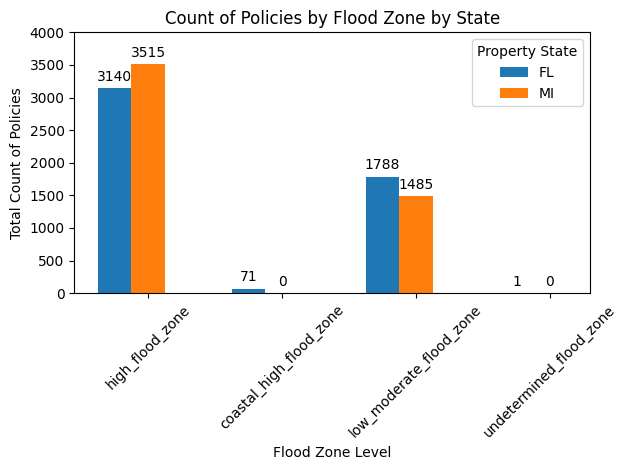

In [95]:
x = np.arange(len(floodzone_types))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout = 'constrained')

for state, count in state_floodzone_counts_df.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=state)
    ax.bar_label(rects, padding = 3)
    multiplier += 1

ax.set_title("Count of Policies by Flood Zone by State")
ax.set_xlabel("Flood Zone Level")
ax.set_ylabel("Total Count of Policies")
ax.set_xticks(x + width, floodzone_types)
plt.xticks(rotation=45)
ax.legend(title="Property State")
ax.set_ylim(0,4000)

plt.tight_layout()
plt.show()

Flordia has only a few coastal flood zones and Michigan has more high flood zones and less low/moderate flood zones. 

4. What is the relationship between the poverty rating of the policy and the average premium rate in the area?


In [175]:
df_poverty = df_sample.dropna(subset='poverty').copy()
df_poverty.shape

(9992, 30)

Text(0, 0.5, 'Single Premium Policy - Zip Code Mean Premium')

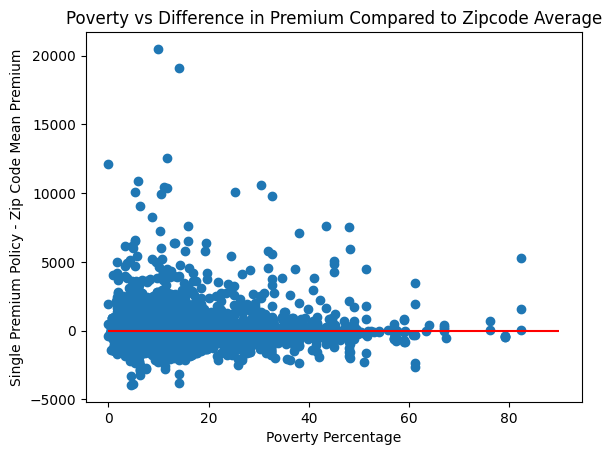

In [192]:
zipcode_mean = df_poverty.groupby('reported_zipcode', as_index=False)['total_insurance_premium_of_the_policy'].mean()
zipcode_mean.rename(columns={'total_insurance_premium_of_the_policy' : 'mean_premium_zipcode'}, inplace=True)
df_sample2 = pd.merge(df_poverty, zipcode_mean, how='left', on='reported_zipcode')

df_sample2['premium_difference'] = df_sample2['total_insurance_premium_of_the_policy'] - df_sample2['mean_premium_zipcode']

x = df_sample2['poverty']
y = df_sample2['premium_difference']

plt.scatter(x,y)
plt.hlines(y=0, xmin=0,xmax=90, colors="red")
plt.title("Poverty vs Difference in Premium Compared to Zipcode Average")
plt.xlabel("Poverty Percentage")
plt.ylabel("Single Premium Policy - Zip Code Mean Premium")

It does not seem that there is a difference in the amount paid based on poverty compared to the zip code premium. This graph seems to show that higher poverty areas have less policies. 

5. Can we predict whether a policy will have a high premium rate (top X% of rates) given the policy’s features?

ANSWER

6. Can we predict Premium amount based on other features to make suggestions for future policies?